In [13]:
import pandas as pd
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
from sklearn.naive_bayes import BernoulliNB
import seaborn as sns

In [14]:

train_data = pd.read_csv('train.csv')

def replace_constituency(value):
    if '(ST)' in value:
        return 'ST'
    elif '(SC)' in value:
        return 'SC'
    else:
        return 'OPEN'

train_data['Constituency ∇'] = train_data['Constituency ∇'].apply(replace_constituency)

train_data['IS_Doctor'] = train_data['Candidate'].apply(lambda x: 1  if 'Dr.' in x else 0)
train_data = train_data.drop(columns=['ID', 'Candidate'])

def convert_currency(value):
    if pd.isna(value):
        return 0
    
    value = value.lower().replace(',', '')
    if 'crore' in value:
        if '+' in value:
            return float(value.replace('crore+', '')) * 10000000
        else:
            num, _ = value.split('crore')
            return float(num) * 10000000
    elif 'lac' in value:
        if '+' in value:
            return float(value.replace('lac+', '')) * 100000
        else:
            num, _ = value.split('lac')
            return float(num) * 100000
    
    elif 'thou' in value:
        if '+' in value:
            return float(value.replace('thou+', '')) * 100000
        else:
            num, _ = value.split('thou')
            return float(num) * 1000
        
    elif 'hund' in value:
        if '+' in value:
            return float(value.replace('hund+', '')) * 100000
        else:
            num, _ = value.split('hund')
            return float(num) * 100
        
    else:
        return float(value)

train_data['Total Assets'] = train_data['Total Assets'].apply(convert_currency)
train_data['Liabilities'] = train_data['Liabilities'].apply(convert_currency)



<Figure size 1600x800 with 0 Axes>

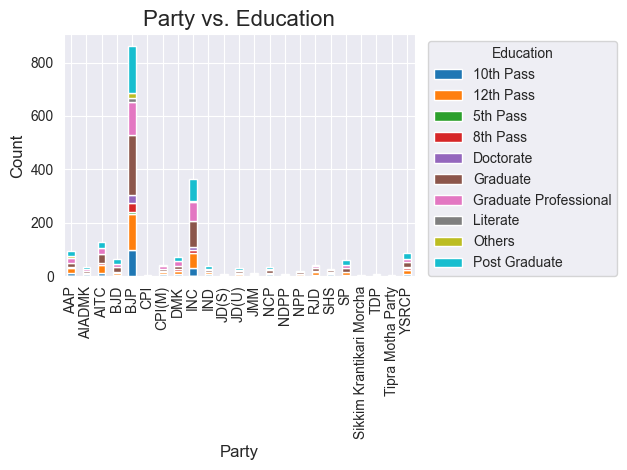

In [15]:

party_education_counts = train_data.groupby(['Party', 'Education']).size().reset_index(name='Count')

plt.figure(figsize=(16, 8))
party_education_counts = party_education_counts.sort_values(['Party', 'Count'], ascending=[True, False])
party_education_counts = party_education_counts.pivot(index='Party', columns='Education', values='Count').fillna(0)
colors = plt.cm.tab10.colors
party_education_counts.plot(kind='bar', stacked=True , color = colors)

plt.xlabel('Party', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Party vs. Education', fontsize=16)
plt.xticks(rotation=90)
plt.legend(title='Education', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

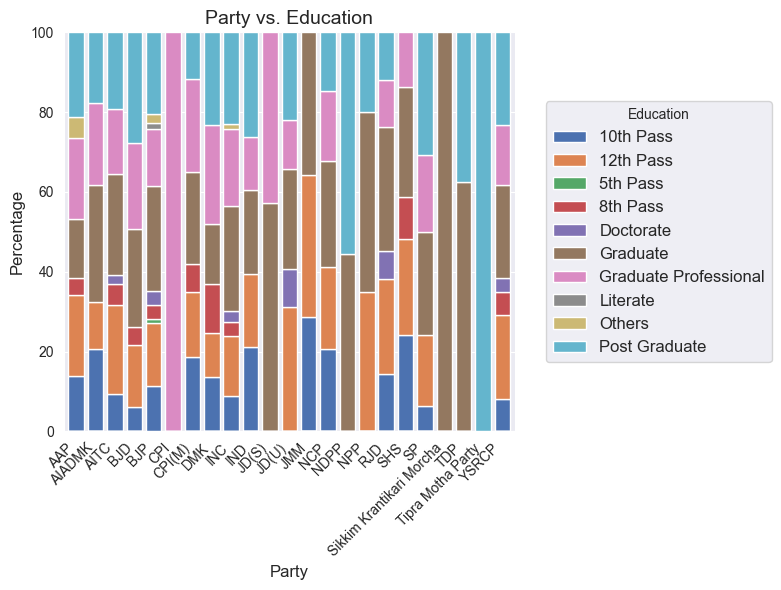

In [16]:


party_education_counts = train_data.groupby(['Party', 'Education']).size().reset_index(name='Count')


party_totals = party_education_counts.groupby('Party')['Count'].sum()


party_education_counts['Percentage'] = party_education_counts.apply(lambda x: x['Count'] / party_totals[x['Party']] * 100, axis=1)


party_education_counts = party_education_counts.sort_values(['Party', 'Count'], ascending=[True, False])
party_education_counts = party_education_counts.pivot(index='Party', columns='Education', values='Percentage').fillna(0)

plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
ax = plt.gca()

colors = sns.color_palette("deep", len(party_education_counts.columns))

party_education_counts.plot(kind='bar', stacked=True, color=colors, ax=ax, width=0.8, edgecolor='white', linewidth=1)

ax.set_xlabel('Party', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.set_title('Party vs. Education', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=10)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Education', loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=12)

sns.despine(top=True, right=True)

ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()

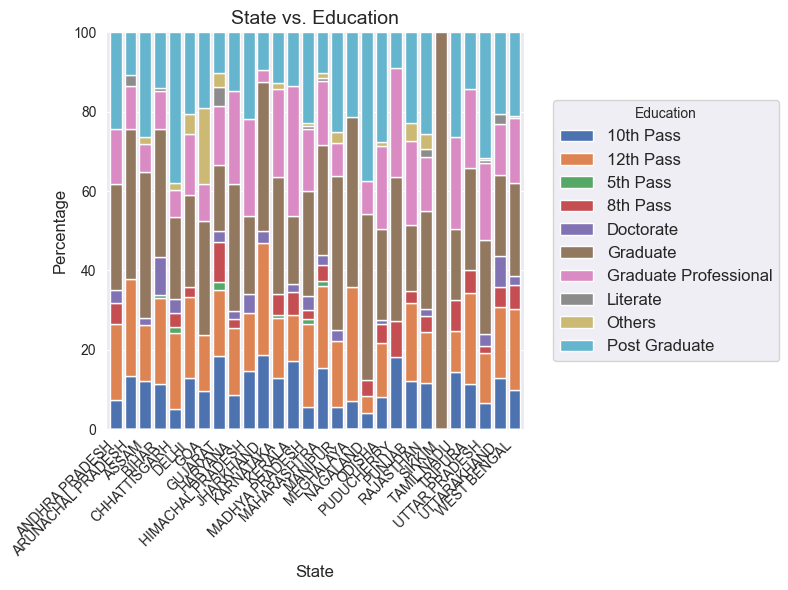

In [17]:


state_education_counts = train_data.groupby(['state', 'Education']).size().reset_index(name='Count')

state_totals = state_education_counts.groupby('state')['Count'].sum()

state_education_counts['Percentage'] = state_education_counts.apply(lambda x: x['Count'] / state_totals[x['state']] * 100, axis=1)

state_education_counts = state_education_counts.sort_values(['state', 'Count'], ascending=[True, False])
state_education_counts = state_education_counts.pivot(index='state', columns='Education', values='Percentage').fillna(0)

plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
ax = plt.gca()

colors = sns.color_palette("deep", len(state_education_counts.columns))

state_education_counts.plot(kind='bar', stacked=True, color=colors, ax=ax, width=0.8, edgecolor='white', linewidth=1)

ax.set_xlabel('State', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.set_title('State vs. Education', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=10)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Education', loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=12)


sns.despine(top=True, right=True)

ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()

/var/folders/8x/81b3tc913b18_8fx0f8wcbsh0000gn/T/ipykernel_1955/3474759154.py:17: UserWarning: Glyph 8711 (\N{NABLA}) missing from current font.
  plt.tight_layout()


<Figure size 1600x800 with 0 Axes>

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8711 (\N{NABLA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


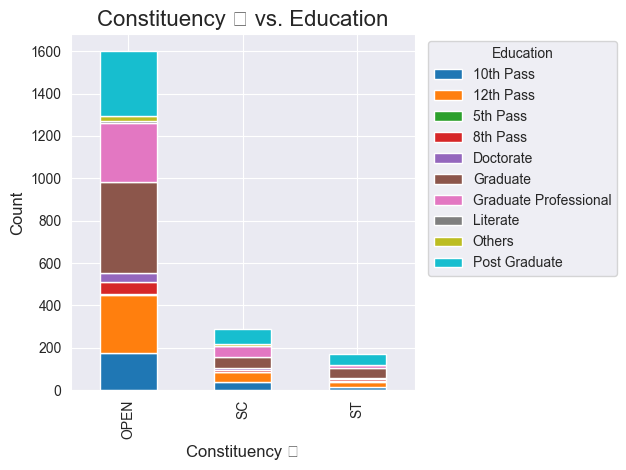

In [18]:
# Group the data by Party and Education, and count the occurrences
party_education_counts = train_data.groupby(['Constituency ∇', 'Education']).size().reset_index(name='Count')

# Plot the data
plt.figure(figsize=(16, 8))
party_education_counts = party_education_counts.sort_values(['Constituency ∇', 'Count'], ascending=[True, False])
party_education_counts = party_education_counts.pivot(index='Constituency ∇', columns='Education', values='Count').fillna(0)
colors = plt.cm.tab10.colors
party_education_counts.plot(kind='bar', stacked=True , color = colors)

# Adjust the plot
plt.xlabel('Constituency ∇', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Constituency ∇ vs. Education', fontsize=16)
plt.xticks(rotation=90)
plt.legend(title='Education', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/8x/81b3tc913b18_8fx0f8wcbsh0000gn/T/ipykernel_1955/438124713.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Party', y='Percentage', data=party_cases, palette='Blues_d')


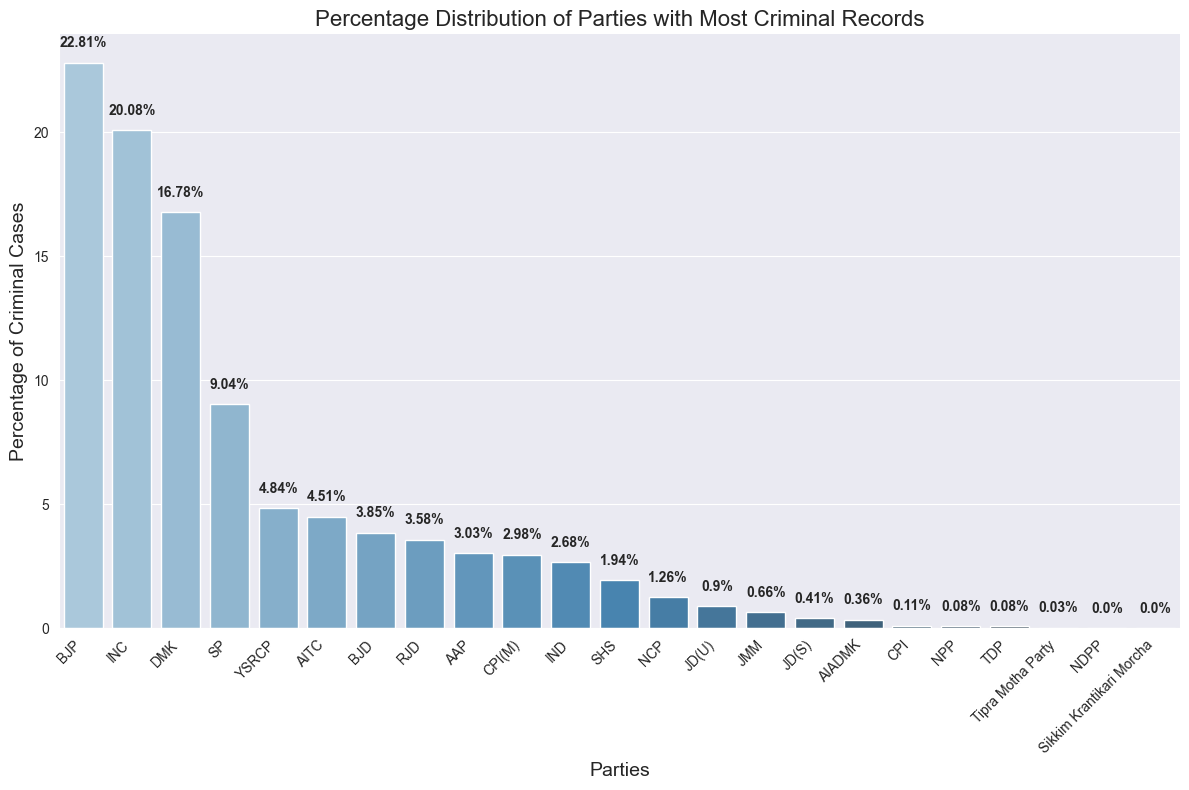

In [19]:

party_cases = train_data.groupby('Party')['Criminal Case'].sum().reset_index()

party_cases = party_cases.sort_values(by='Criminal Case', ascending=False)

total_cases = party_cases['Criminal Case'].sum()
party_cases['Percentage'] = (party_cases['Criminal Case'] / total_cases) * 100

plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
ax = sns.barplot(x='Party', y='Percentage', data=party_cases, palette='Blues_d')

ax.set_xlabel('Parties', fontsize=14)
ax.set_ylabel('Percentage of Criminal Cases', fontsize=14)
ax.set_title('Percentage Distribution of Parties with Most Criminal Records', fontsize=16)

plt.xticks(rotation=45, ha='right')

for i, percentage in enumerate(party_cases['Percentage']):
    ax.text(i, percentage + 0.5, str(round(percentage, 2)) + '%', ha='center', va='bottom', fontweight='bold')

sns.despine(top=True, right=True)

plt.tight_layout()
plt.show()

/var/folders/8x/81b3tc913b18_8fx0f8wcbsh0000gn/T/ipykernel_1955/1533257222.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Party', y='Percentage', data=party_assets, palette='Greens_d')


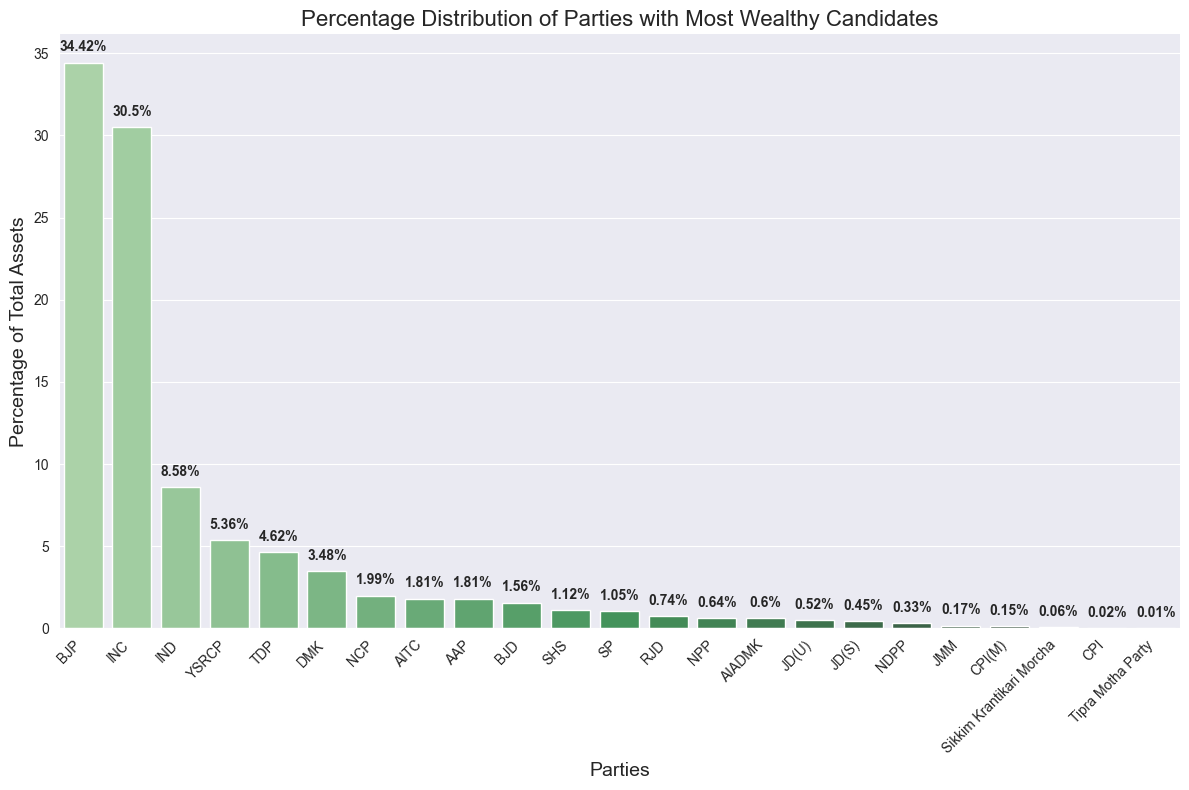

In [20]:


party_assets = train_data.groupby('Party')['Total Assets'].sum().reset_index()

party_assets = party_assets.sort_values(by='Total Assets', ascending=False)

total_assets = party_assets['Total Assets'].sum()
party_assets['Percentage'] = (party_assets['Total Assets'] / total_assets) * 100

plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
ax = sns.barplot(x='Party', y='Percentage', data=party_assets, palette='Greens_d')

ax.set_xlabel('Parties', fontsize=14)
ax.set_ylabel('Percentage of Total Assets', fontsize=14)
ax.set_title('Percentage Distribution of Parties with Most Wealthy Candidates', fontsize=16)

plt.xticks(rotation=45, ha='right')

for i, percentage in enumerate(party_assets['Percentage']):
    ax.text(i, percentage + 0.5, str(round(percentage, 2)) + '%', ha='center', va='bottom', fontweight='bold')

sns.despine(top=True, right=True)

plt.tight_layout()
plt.show()

/var/folders/8x/81b3tc913b18_8fx0f8wcbsh0000gn/T/ipykernel_1955/3988477657.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=education_counts.index, y=education_counts.values, palette='Blues_d')


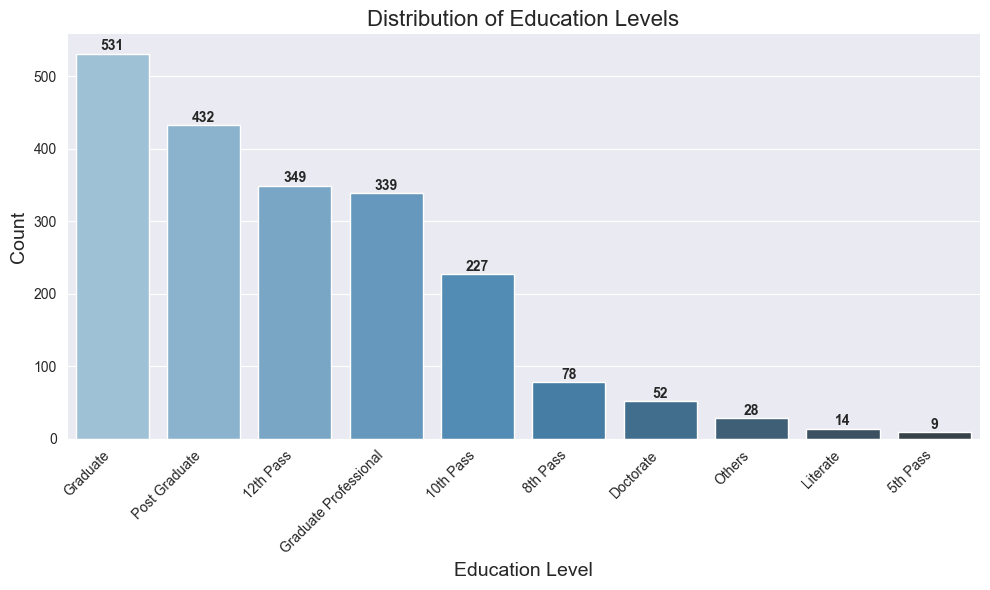

In [21]:


education_counts = train_data['Education'].value_counts()

plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
ax = sns.barplot(x=education_counts.index, y=education_counts.values, palette='Blues_d')


ax.set_xlabel('Education Level', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Distribution of Education Levels', fontsize=16)

plt.xticks(rotation=45, ha='right')

for i, count in enumerate(education_counts.values):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontweight='bold')

sns.despine(top=True, right=True)

plt.tight_layout()
plt.show()

In [22]:


categorical_features = ['Party' ,'state' , 'Constituency ∇' ]
numerical_features = ['Total Assets' ,'Criminal Case', 'Liabilities']

train_data= pd.get_dummies(train_data, columns=categorical_features, drop_first=True)


train_data.head(800)

,Criminal Case,Total Assets,Liabilities,Education,Party_AIADMK,Party_AITC,Party_BJD,Party_BJP,Party_CPI,Party_CPI(M),...,state_PUNJAB,state_RAJASTHAN,state_SIKKIM,state_TAMIL NADU,state_TRIPURA,state_UTTAR PRADESH,state_UTTARAKHAND,state_WEST BENGAL,Constituency ∇_SC,Constituency ∇_ST
0,4,2.110000e+09,20000000.0,8th Pass,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,0,1.000000e+07,0.0,12th Pass,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,0,7.000000e+07,2200000.0,Post Graduate,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,9.000000e+07,2400000.0,Post Graduate,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,2.000000e+07,6100000.0,8th Pass,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,5.000000e+07,900000.0,Post Graduate,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
796,2,1.000000e+07,900000.0,10th Pass,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
797,0,2.100000e+08,6500000.0,Graduate,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
798,0,1.000000e+07,4600000.0,Graduate Professional,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:

X = train_data.drop('Education' , axis=1)
y = train_data['Education']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


BernoulliClf =BernoulliNB(alpha=0.8, binarize=0.1, fit_prior=True, class_prior=None)

BernoulliClf.fit(X_train, y_train)


y_pred = BernoulliClf.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

0.23300970873786409
                       precision    recall  f1-score   support

            10th Pass       0.15      0.08      0.11        49
            12th Pass       0.11      0.06      0.08        67
             5th Pass       0.00      0.00      0.00         1
             8th Pass       0.00      0.00      0.00        20
            Doctorate       0.00      0.00      0.00        14
             Graduate       0.28      0.45      0.35       108
Graduate Professional       0.18      0.20      0.19        66
             Literate       0.00      0.00      0.00         3
               Others       0.00      0.00      0.00         4
        Post Graduate       0.25      0.33      0.28        80

             accuracy                           0.23       412
            macro avg       0.10      0.11      0.10       412
         weighted avg       0.19      0.23      0.20       412



In [24]:

test_data = pd.read_csv('test.csv')

test_data['Constituency ∇'] = test_data['Constituency ∇'].apply(replace_constituency)

test_data['IS_Doctor'] = test_data['Candidate'].apply(lambda x: 1  if 'Dr.' in x else 0)

test_data = test_data.drop(columns=['ID', 'Candidate'])
test_data['Total Assets'] = test_data['Total Assets'].apply(convert_currency)
test_data['Liabilities'] = test_data['Liabilities'].apply(convert_currency)

test_data = pd.get_dummies(test_data, columns=categorical_features, drop_first=True)


test_predictions = BernoulliClf.predict(test_data)


test_result = pd.DataFrame({ 'ID': np.arange(len(test_predictions)) ,'Education': test_predictions})


test_result.to_csv('submission.csv', index=False)


print("Output file generated successfully!")


Output file generated successfully!
